In [1]:
import pandas as pd

In [2]:
raw_housing_data = pd.read_csv("C:/Users/0526p/Jupyter/intershala ml training/ML M6/Raw_Housing_Prices.csv")

In [3]:
raw_housing_data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [4]:
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
ID                                           21613 non-null int64
Date House was Sold                          21613 non-null object
Sale Price                                   21609 non-null float64
No of Bedrooms                               21613 non-null int64
No of Bathrooms                              21609 non-null float64
Flat Area (in Sqft)                          21604 non-null float64
Lot Area (in Sqft)                           21604 non-null float64
No of Floors                                 21613 non-null float64
Waterfront View                              21613 non-null object
No of Times Visited                          21613 non-null object
Condition of the House                       21613 non-null object
Overall Grade                                21613 non-null int64
Area of the House from Basement (in Sqft)    21610 non-null float64
Basement Area (in

### Sale Price is taget variable
### Univariate Analysis

In [5]:
raw_housing_data['Sale Price'].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

In [6]:
raw_housing_data['Sale Price'].tail(10)

21603     507250.0
21604     429000.0
21605     610685.0
21606    1010000.0
21607     475000.0
21608     360000.0
21609     400000.0
21610     402101.0
21611     400000.0
21612     325000.0
Name: Sale Price, dtype: float64

### Eyeballing through pandas function

In [7]:
raw_housing_data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

### Use graph for eyeballing the outliers

In [8]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

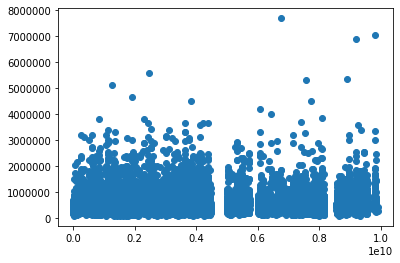

In [9]:
plt.scatter(raw_housing_data['ID'], raw_housing_data['Sale Price'])
plt.show

### use seaborn library (matplot unable to ignore the missing values in the column)

In [10]:
import seaborn as sns

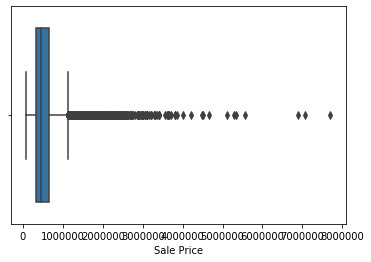

In [11]:
sns.boxplot(raw_housing_data['Sale Price'])

## Treating outliers
### different ways of treating outliers:
### - Deletion: delete the entire row
### - Capping or Imputing: replace with the mean, median or mode values
### - Data Transformation: replace with the log, squre root or cuberoot of variable vlaues
### - Binning: different bins are formed based on the values of the variables to treate outliers

### Treate Outliers using imputation

In [12]:
q1 = raw_housing_data['Sale Price'].quantile(0.25)
q3 = raw_housing_data['Sale Price'].quantile(0.75)

In [13]:
iqr = q3 - q1
iqr

323050.0

In [14]:
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
lower_limit, upper_limit

(-162625.0, 1129575.0)

In [15]:
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    elif value<lower_limit:
        return lower_limit
    else:
        return value
    
raw_housing_data['Sale Price'] = raw_housing_data['Sale Price'].apply(limit_imputer)

In [16]:
raw_housing_data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

## Ways to Treat Missing Values
### - Deletion: Delete the missing vlaues rows\
### - Imputation: Replace with the mean, meadian or mode vlaues (we don't apply on the target variable bcz model learn and predict from the target values so if we apply imputation which means model learn from the target variable data which we derived not the actual data


### Treat Missing Values

In [17]:
raw_housing_data.dropna(inplace = True, axis = 0, subset = ['Sale Price'])

In [18]:
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
ID                                           21609 non-null int64
Date House was Sold                          21609 non-null object
Sale Price                                   21609 non-null float64
No of Bedrooms                               21609 non-null int64
No of Bathrooms                              21605 non-null float64
Flat Area (in Sqft)                          21600 non-null float64
Lot Area (in Sqft)                           21600 non-null float64
No of Floors                                 21609 non-null float64
Waterfront View                              21609 non-null object
No of Times Visited                          21609 non-null object
Condition of the House                       21609 non-null object
Overall Grade                                21609 non-null int64
Area of the House from Basement (in Sqft)    21606 non-null float64
Basement Area (in

(array([ 501., 3379., 4513., 3911., 3069., 1977., 1432.,  877.,  531.,
        1419.]),
 array([  75000. ,  180457.5,  285915. ,  391372.5,  496830. ,  602287.5,
         707745. ,  813202.5,  918660. , 1024117.5, 1129575. ]),
 <a list of 10 Patch objects>)

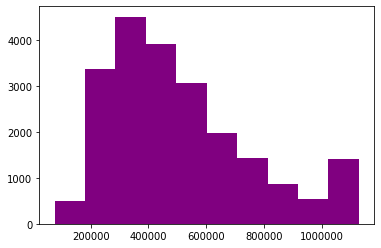

In [19]:
plt.hist(raw_housing_data['Sale Price'], bins = 10, color = 'purple')

## Handling Missing Values in Independent Variable

### handling missing values in independent variable by Imputing not by deletion

In [20]:
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
ID                                           21609 non-null int64
Date House was Sold                          21609 non-null object
Sale Price                                   21609 non-null float64
No of Bedrooms                               21609 non-null int64
No of Bathrooms                              21605 non-null float64
Flat Area (in Sqft)                          21600 non-null float64
Lot Area (in Sqft)                           21600 non-null float64
No of Floors                                 21609 non-null float64
Waterfront View                              21609 non-null object
No of Times Visited                          21609 non-null object
Condition of the House                       21609 non-null object
Overall Grade                                21609 non-null int64
Area of the House from Basement (in Sqft)    21606 non-null float64
Basement Area (in

##  

In [21]:
import numpy as np

In [22]:
numerical_columns = ['No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 
                    'Area of the House from Basement (in Sqft)', 'Latitude', 
                    'Longitude', 'Living Area after Renovation (in Sqft)']

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
raw_housing_data[numerical_columns] = imputer.fit_transform(raw_housing_data[numerical_columns])

In [24]:
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
ID                                           21609 non-null int64
Date House was Sold                          21609 non-null object
Sale Price                                   21609 non-null float64
No of Bedrooms                               21609 non-null int64
No of Bathrooms                              21609 non-null float64
Flat Area (in Sqft)                          21609 non-null float64
Lot Area (in Sqft)                           21609 non-null float64
No of Floors                                 21609 non-null float64
Waterfront View                              21609 non-null object
No of Times Visited                          21609 non-null object
Condition of the House                       21609 non-null object
Overall Grade                                21609 non-null int64
Area of the House from Basement (in Sqft)    21609 non-null float64
Basement Area (in

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
raw_housing_data['Zipcode'] = imputer.fit_transform(raw_housing_data['Zipcode'])

ValueError: Expected 2D array, got 1D array instead:
array=[98178. 98125. 98028. ... 98144. 98027. 98144.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [26]:
raw_housing_data['Zipcode'].shape

(21609,)

In [27]:
column = raw_housing_data['Zipcode'].values.reshape(-1, 1)
column.shape

(21609, 1)

In [28]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
raw_housing_data['Zipcode'] = imputer.fit_transform(column)

In [29]:
raw_housing_data['Zipcode'].describe()

count    21609.000000
mean     98077.940488
std         53.506305
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: Zipcode, dtype: float64

## Variable Transformation

### not certian use of Zipcode as numerical variable it only shows the locality so we can use it as a categorial variable

In [30]:
raw_housing_data['Zipcode'] = raw_housing_data['Zipcode'].astype(object)

In [31]:
raw_housing_data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    f

### converty the categorical variable to numerical variable if the items are numerical in catergorical form

In [32]:
raw_housing_data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [33]:
mapping = {'None':0, 'Once': 1, 'Twice': 2, 'Thrice': 3, 'Four': 4}

In [34]:
raw_housing_data['No of Times Visited'] = raw_housing_data['No of Times Visited'].map(mapping)

In [35]:
raw_housing_data['No of Times Visited'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

### Deriv a  new varible from a existing variable or combine two variables to transform a new variable

In [36]:
raw_housing_data.head(5)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,7,1180.0,0,63,0,98178,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,7,2170.0,400,67,1991,98125,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,6,770.0,0,85,0,98028,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,7,1050.0,910,53,0,98136,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,8,1680.0,0,31,0,98074,47.6168,-122.045,1800.0,7503


In [37]:
raw_housing_data['Ever Renovate'] = np.where(raw_housing_data['Renovated Year'] == 0, 'No', 'Yes')

In [38]:
raw_housing_data.head(5)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074,47.6168,-122.045,1800.0,7503,No


In [39]:
raw_housing_data['Purchase Year'] = pd.DatetimeIndex(raw_housing_data['Date House was Sold']).year

In [40]:
raw_housing_data.head(5)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate,Purchase Year
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,0,63,0,98178,47.5112,-122.257,1340.0,5650,No,2017
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,400,67,1991,98125,47.7210,-122.319,1690.0,7639,Yes,2017
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,0,85,0,98028,47.7379,-122.233,2720.0,8062,No,2016
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,910,53,0,98136,47.5208,-122.393,1360.0,5000,No,2017
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,0,31,0,98074,47.6168,-122.045,1800.0,7503,No,2016


In [41]:
raw_housing_data['Years Since Renovated'] = np.where(raw_housing_data['Ever Renovate'] == 'Yes', 
                                                     abs(raw_housing_data['Purchase Year'] - 
                                                         raw_housing_data['Renovated Year']), 0)

In [42]:
raw_housing_data.head(5)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate,Purchase Year,Years Since Renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074,47.6168,-122.045,1800.0,7503,No,2016,0


In [43]:
raw_housing_data.drop(columns = ['Date House was Sold', 'Purchase Year', 'Renovated Year'], inplace = True)

In [44]:
raw_housing_data.head(5)

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate,Years Since Renovated
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074,47.6168,-122.045,1800.0,7503,No,0


## Correaltion

In [45]:
raw_housing_data['Sale Price'].corr(raw_housing_data['Flat Area (in Sqft)'])

0.6951704258420672

In [46]:
np.corrcoef(raw_housing_data['Sale Price'], raw_housing_data['Flat Area (in Sqft)'])

array([[1.        , 0.69517043],
       [0.69517043, 1.        ]])

In [47]:
raw_housing_data.drop(columns=['ID']).corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovated
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.356114,0.680914,0.606527,0.307513,-0.064306,0.402430,0.045401,0.629944,0.092325,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,-0.008708,0.129569,0.391771,0.029264,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,0.024570,0.223171,0.568568,0.087226,0.003551
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,0.052538,0.240091,0.756185,0.183223,0.023503
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,-0.085719,0.229449,0.144507,0.718527,0.013835
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,0.049692,0.125620,0.280106,-0.011204,-0.000901
No of Times Visited,0.356114,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,0.006162,-0.078453,0.280452,0.072561,0.093546
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,0.111226,0.201736,0.681362,0.107581,-0.024388
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,-0.000819,0.343793,0.731996,0.194106,0.010491
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,0.110451,-0.144822,0.200302,0.017263,0.029158


## Data exploration in Categorical Variable

Count the unique values

In [48]:
raw_housing_data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [49]:
import matplotlib.pyplot as plt

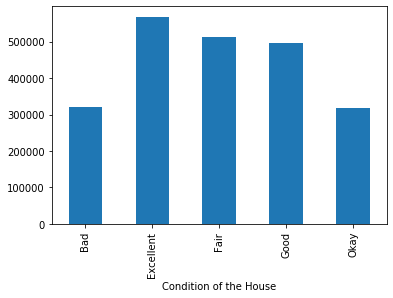

In [50]:
raw_housing_data.groupby('Condition of the House')['Sale Price'].mean().plot(kind = 'bar')

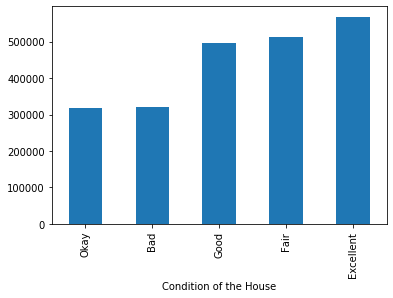

In [51]:
raw_housing_data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind = 'bar')

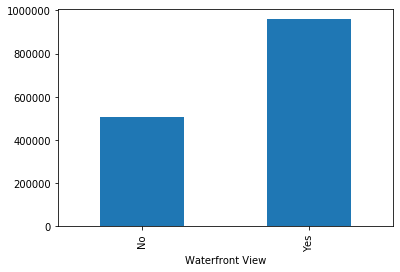

In [52]:
raw_housing_data.groupby('Waterfront View')['Sale Price'].mean().plot(kind = 'bar')

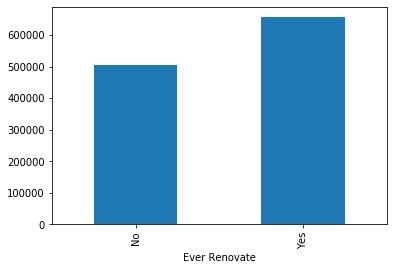

In [53]:
raw_housing_data.groupby('Ever Renovate')['Sale Price'].mean().plot(kind = 'bar')

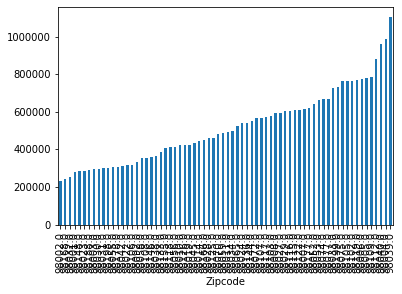

In [54]:
raw_housing_data.groupby('Zipcode')['Sale Price'].mean().sort_values().plot(kind = 'bar')

Q. Is there a mathematical or statistical way to compute relationship between a categorical and a numerical varialbe?
- The method of finding out whether a categorical variable is having an impact on the numerical variable - ANOVA but it can not be quantify
- ANOVA stands for Analysis of Variance
- It checks if the means, i.e., average value of the target variable across unique values of a categorical variable are equal or not
- It assessed the importace of one or more levels by compare the means of target variable at unique values of the categorical variable


When we execute ANOVA we have certain hypothesis:
- Null Hypothesis: There is no differenc in means
- Alternate Hypothesis: At least one of the means is different

Mean value can be examin based on two values that are obtained from ANOVA
- F-Value = A large Value
- p-Value < 0.05

if we want to reject Null Hypothesis then we should have p-Value<0.05 and accept the Alternate Hypothesis which has means are different and categorical variable does have an impact on target variable


Two types of ANOVA:
- One way ANOVA: it deals with one independent variable only
- Two way ANOVA: it deals with two or more independent variable

In [55]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [56]:
raw_housing_data = raw_housing_data.rename(columns = {'Sale Price': 'Sale_Price'})

In [57]:
raw_housing_data = raw_housing_data.rename(columns = {'Waterfront View': 'Waterfront_View'})

In [58]:
raw_housing_data = raw_housing_data.rename(columns = {'Condition of the House': 'Condition_of_the_House'})

In [59]:
raw_housing_data = raw_housing_data.rename(columns = {'Ever Renovate': 'Ever_Renovated'})

In [60]:
raw_housing_data.head(5)

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years Since Renovated
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074,47.6168,-122.045,1800.0,7503,No,0


In [61]:
mod = ols('Sale_Price ~ Condition_of_the_House', data = raw_housing_data).fit()

In [62]:
Anova_Table = sm.stats.anova_lm(mod, typ = 2)

In [63]:
# Anova can only tell categorical variable have an impact or not
# it does not tell weather impact is strong or weak
Anova_Table

,sum_sq,df,F,PR(>F)
Condition_of_the_House,1.441831e+13,4.0,58.25563,5.447605e-49
Residual,1.336752e+15,21604.0,NaN,NaN


In [64]:
mod = ols('Sale_Price ~ Waterfront_View', data = raw_housing_data).fit()
sm.stats.anova_lm(mod, typ = 2)

,sum_sq,df,F,PR(>F)
Waterfront_View,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [65]:
mod = ols('Sale_Price ~ Ever_Renovated', data = raw_housing_data).fit()
sm.stats.anova_lm(mod, typ = 2)

,sum_sq,df,F,PR(>F)
Ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [66]:
mod = ols('Sale_Price ~ Zipcode', data = raw_housing_data).fit()
sm.stats.anova_lm(mod, typ = 2)

,sum_sq,df,F,PR(>F)
Zipcode,6.859657e+14,69.0,321.902033,0.0
Residual,6.652044e+14,21539.0,NaN,NaN


#### Binning and Creation of Dummy Variable:
- It refers to the process of transforming a categorical variable into a set of numeircal or boolean variables, called dummy variables, each of which has values of 0 or 1
- The number of dummy variables created for a categorical variable depends on the number of unique vlaues that categorical variable has


Q. Why do we need dummy variables?
- Regression modeling requires all the independent variables to be numericla variables.
- By creating dummy variables, we transform a categorical variable into a umericla variable
- After creating required dummy variables for a categorical variable, categorical variable is dropped from the dataset
- We create dummy variable by using 'get_dummies' function of pandas library

In [67]:
raw_housing_data = pd.get_dummies(raw_housing_data,
                                 columns = ['Condition_of_the_House'],
                                 drop_first = True)

In [68]:
raw_housing_data.head(5)

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Overall Grade,...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years Since Renovated,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,7,...,47.5112,-122.257,1340.0,5650,No,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,7,...,47.7210,-122.319,1690.0,7639,Yes,26,0,1,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,6,...,47.7379,-122.233,2720.0,8062,No,0,0,1,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,7,...,47.5208,-122.393,1360.0,5000,No,0,1,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,8,...,47.6168,-122.045,1800.0,7503,No,0,0,1,0,0


In [69]:
# we can also write this way
#raw_housing_data = pd.get_dummies(raw_housing_data,
 #                                columns = ['Waterfront_View', 'Ever_Renovated'],
  #                               drop_first = True)

In [70]:
raw_housing_data = pd.get_dummies(raw_housing_data,
                                 columns = ['Waterfront_View'],
                                 drop_first = True)

In [71]:
raw_housing_data = pd.get_dummies(raw_housing_data,
                                 columns = ['Ever_Renovated'],
                                 drop_first = True)

In [72]:
raw_housing_data.head(5)

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovated,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,-122.319,1690.0,7639,26,0,1,0,0,0,1
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,-122.045,1800.0,7503,0,0,1,0,0,0,0


#### Binning
- if the number of level for a categorical variable is more (say>20), then bin these level into fewer groups before creating dummy variables
- Zipcode : 71 Levels
          70 dummy variables are required
- Bin Zipcode with similar average Sale Price into groups

In [73]:
Zip_Table = raw_housing_data.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price', ascending = True)

In [74]:
Zip_Table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [75]:
Zip_Table['Zipcode_Group'] = pd.cut(Zip_Table['Sale_Price'], bins = 10,
                                   labels = ['Zipcode_Group_0',
                                            'Zipcode_Group_1',
                                            'Zipcode_Group_2',
                                            'Zipcode_Group_3',
                                            'Zipcode_Group_4',
                                            'Zipcode_Group_5',
                                            'Zipcode_Group_6',
                                            'Zipcode_Group_7',
                                            'Zipcode_Group_8',
                                            'Zipcode_Group_9'],
                                   include_lowest = True)

In [76]:
Zip_Table = Zip_Table.drop(columns = 'Sale_Price')

- The 'merge' funciton of the pandas library is used to merge two table
- An variable (key or joining parameter) which is common in both the tables is requried for joining the tables

Join type:
- When two tables are joined, one table will be on left and other will be on the right
- In a left join, all rows of left table will be retured along with matching fields from the other table
- In a right join, all elements of right table will be returned along with matching fields form the other table

In [77]:
raw_housing_data = pd.merge(raw_housing_data,
                           Zip_Table,
                           left_on = 'Zipcode',
                           how = 'left',
                           right_index = True)

In [78]:
raw_housing_data.head(5)

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovated,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes,Zipcode_Group
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,1340.0,5650,0,0,1,0,0,0,0,Zipcode_Group_0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1690.0,7639,26,0,1,0,0,0,1,Zipcode_Group_2
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,2720.0,8062,0,0,1,0,0,0,0,Zipcode_Group_2
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,1360.0,5000,0,1,0,0,0,0,0,Zipcode_Group_3
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,1800.0,7503,0,0,1,0,0,0,0,Zipcode_Group_4


In [79]:
raw_housing_data = raw_housing_data.drop(columns = 'Zipcode')

In [80]:
raw_housing_data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovated,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes,Zipcode_Group
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,1340.0,5650,0,0,1,0,0,0,0,Zipcode_Group_0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1690.0,7639,26,0,1,0,0,0,1,Zipcode_Group_2
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,2720.0,8062,0,0,1,0,0,0,0,Zipcode_Group_2
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,1360.0,5000,0,1,0,0,0,0,0,Zipcode_Group_3
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,1800.0,7503,0,0,1,0,0,0,0,Zipcode_Group_4


In [81]:
raw_housing_data = pd.get_dummies(raw_housing_data,
                                 columns = ['Zipcode_Group'],
                                 drop_first = True)

In [82]:
raw_housing_data.head(5)

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0


## Splitting of Data
### Seperate Dependent and Independent Variables
- Independent   variable : x
- Dependent variable : y
- using iloc function

In [97]:
raw_housing_data.drop(columns = ['ID'], inplace = True)
raw_housing_data

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,0,0,0,1,0,0,0,0,0,0
21609,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,0,1,0,0,0,0,0,0,0,0
21610,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,0,0,0,1,0,0,0,0,0,0
21611,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,0,0,0,0,1,0,0,0,0,0


In [98]:
y = raw_housing_data.iloc[:, 0]

In [99]:
x = raw_housing_data.iloc[:, 1:31]

In [100]:
x.head(5)

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,...,1,0,1,0,0,0,0,0,0,0
2,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,...,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,...,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,...,0,0,0,0,1,0,0,0,0,0


### Seperate x and y into train an test data
Data:
- Train Dataset: To educate or train our models
- Test Dataset: To examin the model performance
- Split ration changes based on the size of the datasets and probelm statement
- Ideal split ratio: 70:30

#### the sklearn.model_seletion library is used to split data
#### the 'shape' function for finding out the dimesnsions of a table

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [106]:
x_train.shape

(15126, 30)

In [107]:
x_test.shape

(6483, 30)

In [108]:
y_train.shape

(15126,)

In [110]:
y_test.shape

(6483,)

### Feature Scaling
- Feature scaling is all about scaling the feature variables/independent variables into the same range and magnitude

Problems if different magnitude and range:
- variables have higher magnitude and range will have more impact than smaller variables so it not giving equal weight of all variables
- gradient descent algo may take long time to find coefficients of linear regression 

Uses:
- not biased towards a particular variable
- used for algo where data points distance measure involved like logistic Reg, Linear Reg, KNN, principal component analysis,..
- not required for tree algo such as random forest, dicision trees

Techniques of Feature Scaling
- Standardisation
- Min Max Scaling
- Normalization

Standardisation
-  it rescale the feature values so that they have the properties of standard Normal Distribution with mean as 0 and the standard deviation of 1
- x = (x- mean)/std

Min Max Scaling
- the value range for the transformed variables lies between [0, 1]
- x = (x-min(x))/(max(x) - min(x))

Normalization
- The range is fixed from -1 to 1
- Also called mean normalization
- x = (x- mean(x))/(max(x) - min(x))

Where to use (Scaling Using Python):
- Standardisation method used when linear regression model is built
- it assumes input variable in linear reg is normally distributed

#### The 'preprocessing' library from sklearn used for the standardisation

In [111]:
from sklearn import preprocessing

In [112]:
scale = preprocessing.StandardScaler()

In [113]:
x_train = scale.fit_transform(x_train)

In [114]:
x_train

array([[-1.44984306, -1.43875298, -1.06903447, ..., -0.11308736,
        -0.16795887, -0.04604398],
       [-0.3942825 ,  0.49980523, -0.23503511, ..., -0.11308736,
        -0.16795887, -0.04604398],
       [-0.3942825 , -0.46947387, -0.64661921, ..., -0.11308736,
        -0.16795887, -0.04604398],
       ...,
       [-0.3942825 ,  0.1767122 , -0.60329456, ..., -0.11308736,
        -0.16795887, -0.04604398],
       [-0.3942825 ,  0.49980523, -0.39317005, ..., -0.11308736,
        -0.16795887, -0.04604398],
       [-0.3942825 , -0.14638084, -0.67911269, ..., -0.11308736,
        -0.16795887, -0.04604398]])

In [116]:
x_test = scale.fit_transform(x_test)

In [117]:
x_test

array([[-1.53682138,  0.50161509, -0.44842832, ..., -0.11035391,
        -0.17091222, -0.05276573],
       [-0.4103982 ,  0.50161509, -0.56975125, ..., -0.11035391,
        -0.17091222, -0.05276573],
       [-0.4103982 , -1.4684802 , -0.82342645, ..., -0.11035391,
        -0.17091222, -0.05276573],
       ...,
       [ 0.71602498, -1.4684802 , -0.75725031, ..., -0.11035391,
        -0.17091222, -0.05276573],
       [-0.4103982 , -0.48343255, -0.60283932, ..., -0.11035391,
        -0.17091222, -0.05276573],
       [ 0.71602498,  1.81501194,  1.59200264, ..., -0.11035391,
        -0.17091222, -0.05276573]])